In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline


# Generate mock dataset (for demo purpose)
date_range = pd.date_range(start="2010-01-01", end="2024-12-31", freq="D")
np.random.seed(42)
ice_extent = 10 + np.sin(np.linspace(0, 50, len(date_range))) + np.random.normal(0, 0.5, len(date_range))
df = pd.DataFrame({"Date": date_range, "Extent": ice_extent}).set_index("Date")
df.head()

,Extent
Date,
2010-01-01,10.248357
2010-01-02,9.939995
2010-01-03,10.342098
2010-01-04,10.788894
2010-01-05,9.919425


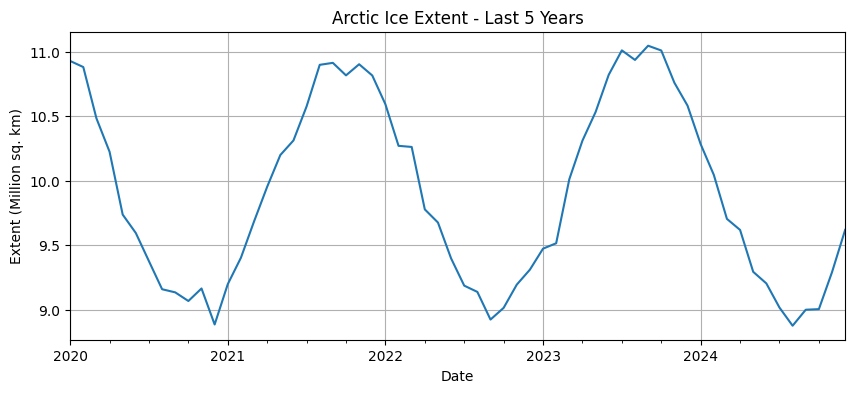

In [8]:
# Resample to monthly averages
monthly_df = df['Extent'].resample('ME').mean()

# Visualize last 5 years
monthly_df[-60:].plot(title="Arctic Ice Extent - Last 5 Years", figsize=(10,4))
plt.ylabel("Extent (Million sq. km)")
plt.grid(True)
plt.show()

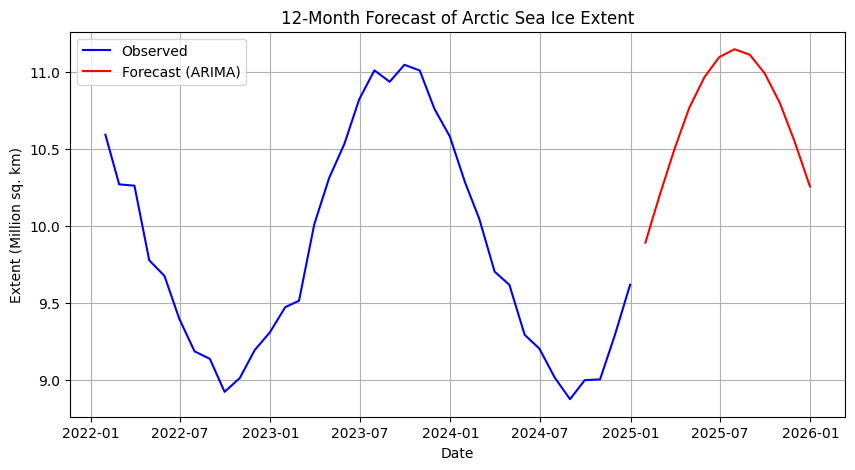

In [9]:

# Fit ARIMA model
model = ARIMA(monthly_df, order=(5, 1, 2))
arima_result = model.fit()
forecast = arima_result.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(monthly_df.index[-36:], monthly_df.values[-36:], label="Observed", color="blue")
future_index = pd.date_range(monthly_df.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')
plt.plot(future_index, forecast, label="Forecast (ARIMA)", color="red")
plt.title("12-Month Forecast of Arctic Sea Ice Extent")
plt.xlabel("Date")
plt.ylabel("Extent (Million sq. km)")
plt.legend()
plt.grid(True)
plt.show()